# HW 2: SVD and PCA for Machine Learning

## Visualizing dyad
Explanation: The dyad is a vector that has another vector as its coefficient and if you sum two dyads you get a dyadic, example:
Consider the following example:

A dyad is a product of two vectors. For instance, if we have vectors $ \mathbf{u} = \begin{bmatrix} 1 \\ 2 \end{bmatrix} $ and $ \mathbf{v} = \begin{bmatrix} 3 \\ 4 \end{bmatrix} $, the dyad $ \mathbf{u} \mathbf{v}^T $ is:

$
\mathbf{u} \mathbf{v}^T = \begin{bmatrix} 1 \\ 2 \end{bmatrix} \begin{bmatrix} 3 & 4 \end{bmatrix} = \begin{bmatrix} 1 \cdot 3 & 1 \cdot 4 \\ 2 \cdot 3 & 2 \cdot 4 \end{bmatrix} = \begin{bmatrix} 3 & 4 \\ 6 & 8 \end{bmatrix}
$

A dyadic is a sum of dyads. For example, if we have another pair of vectors $ \mathbf{a} = \begin{bmatrix} 5 \\ 6 \end{bmatrix} $ and $ \mathbf{b} = \begin{bmatrix} 7 \\ 8 \end{bmatrix} $, the dyad $ \mathbf{a} \mathbf{b}^T $ is:

$
\mathbf{a} \mathbf{b}^T = \begin{bmatrix} 5 \\ 6 \end{bmatrix} \begin{bmatrix} 7 & 8 \end{bmatrix} = \begin{bmatrix} 5 \cdot 7 & 5 \cdot 8 \\ 6 \cdot 7 & 6 \cdot 8 \end{bmatrix} = \begin{bmatrix} 35 & 40 \\ 42 & 48 \end{bmatrix}
$

The dyadic $ \mathbf{u} \mathbf{v}^T + \mathbf{a} \mathbf{b}^T $ is:

$
\mathbf{u} \mathbf{v}^T + \mathbf{a} \mathbf{b}^T = \begin{bmatrix} 3 & 4 \\ 6 & 8 \end{bmatrix} + \begin{bmatrix} 35 & 40 \\ 42 & 48 \end{bmatrix} = \begin{bmatrix} 3 + 35 & 4 + 40 \\ 6 + 42 & 8 + 48 \end{bmatrix} = \begin{bmatrix} 38 & 44 \\ 48 & 56 \end{bmatrix}
$


Consider an image from `skimage.data`. For simplicity, say that $X \in \mathbb{R}^{m \times n}$ is the matrix representing that image. You are asked to visualize the dyad of the SVD Decomposition of $X$ and the result of compressing the image via SVD. In particular:

* Load the image into memory and compute its SVD;
* Visualize some of the dyad $\sigma_i u_i v_i^T$ of this decomposition. What do you notice?
* Plot the singular values of $X$. Do you note something?
* Visualize the $k$-rank approximation of $X$ for different values of $k$. What do you observe?
* Compute and plot the approximation error $|| X − X_k ||_F$ for increasing values of $k$, where $X_k$ is the $k$-rank approximation of $k$.
* Plot the compression factor: $c_k = 1 − \frac{k(m+n+1)}{mn}$ for increasing $k$.
* Compute the value $k$ such that $c_k = 0$ (i.e. when the compressed image requires the same amount of informations of those of the uncompressed image). What is the approximation error for this value of $k$? Comment.

It is strongly recommended (but not mandatory) to consider a grey-scale image for this exercise. You can also use an image downloaded from the web.

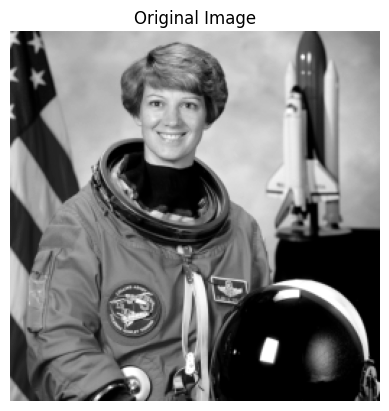

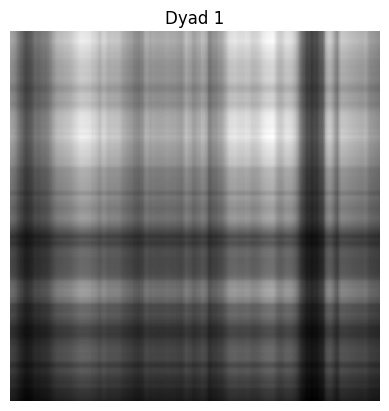

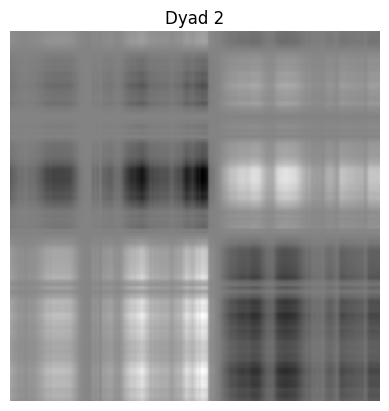

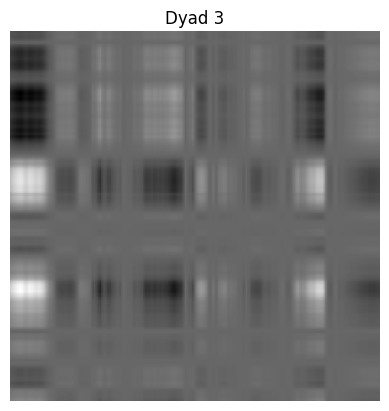

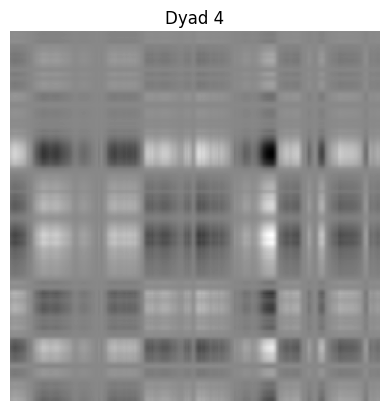

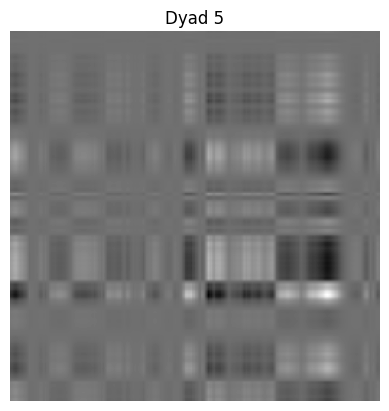

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import resize

# Load the image and convert it to grayscale
image = color.rgb2gray(data.astronaut())
image = resize(image, (256, 256))  # Resize for simplicity

# Print the image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Compute the SVD
U, S, VT = np.linalg.svd(image, full_matrices=False)

# Function to visualize a dyad
def visualize_dyad(U, S, VT, i):
    dyad = S[i] * np.outer(U[:, i], VT[i, :])
    plt.imshow(dyad, cmap='gray')
    plt.title(f'Dyad {i+1}')
    plt.axis('off')
    plt.show()

# Visualize the first few dyads
for i in range(5):
    visualize_dyad(U, S, VT, i)

### Visualizing Decomposition:
You cannot see any clear image, but is noticiable that each image has its own compressed characteristics, and they have quadricular formatted cells. Also it seems that the higher the order of the dyad we notice less details, such as contrasts. This might due the fact that the first dyad has the greatest singular value this means it has the most information about the image.
Using the dyads we can reconstruct the image with good approximation, let's do it:

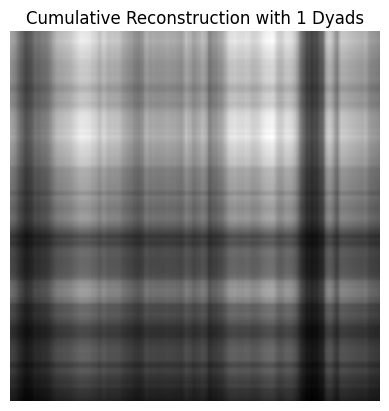

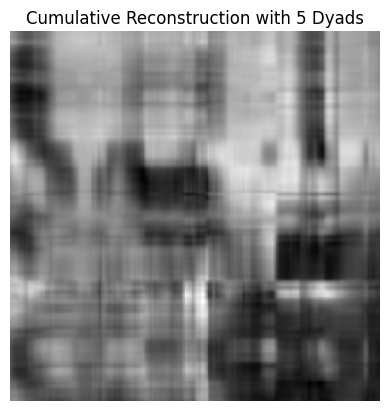

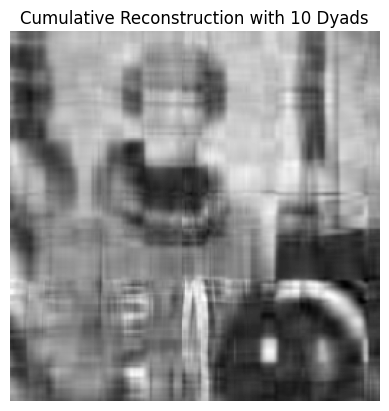

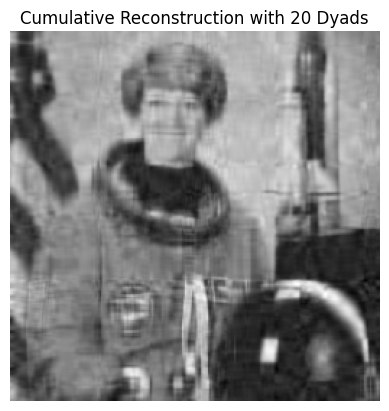

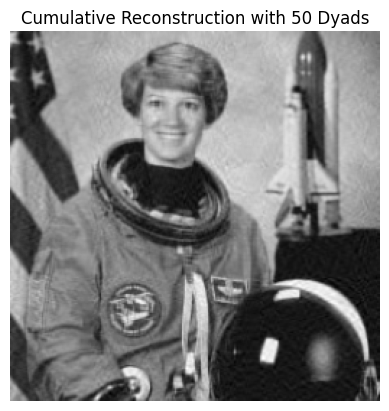

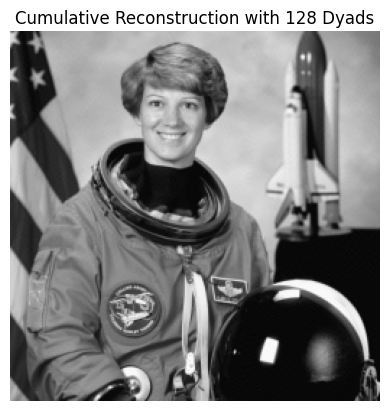

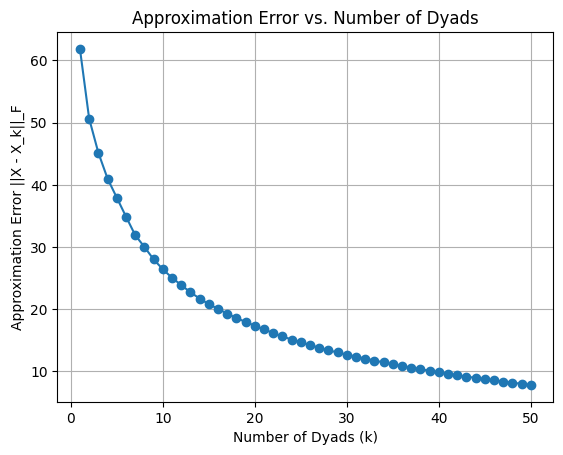

In [21]:
def visualize_cumulative_reconstruction(U, S, VT, num_dyads):
    reconstruction = np.zeros_like(image)
    for i in range(num_dyads):
        reconstruction += S[i] * np.outer(U[:, i], VT[i, :])
    plt.imshow(reconstruction, cmap='gray')
    plt.title(f'Cumulative Reconstruction with {num_dyads} Dyads')
    plt.axis('off')
    plt.show()
def compute_approximation_error(U, S, VT, k):
    reconstruction = np.zeros_like(image)
    for i in range(k):
        reconstruction += S[i] * np.outer(U[:, i], VT[i, :])
    error = np.linalg.norm(image - reconstruction, 'fro')
    return error
errors = []
ks = range(1, 51)
for k in ks:
    error = compute_approximation_error(U, S, VT, k)
    errors.append(error)
for num_dyads in [1, 5, 10, 20, 50, 128]:
    visualize_cumulative_reconstruction(U, S, VT, num_dyads)
plt.plot(ks, errors, marker='o')
plt.xlabel('Number of Dyads (k)')
plt.ylabel('Approximation Error ||X - X_k||_F')
plt.title('Approximation Error vs. Number of Dyads')
plt.grid(True)
plt.show()

### Plot the compression factor: $c_k = 1 − \frac{k(m+n+1)}{mn}$ for increasing $k$.

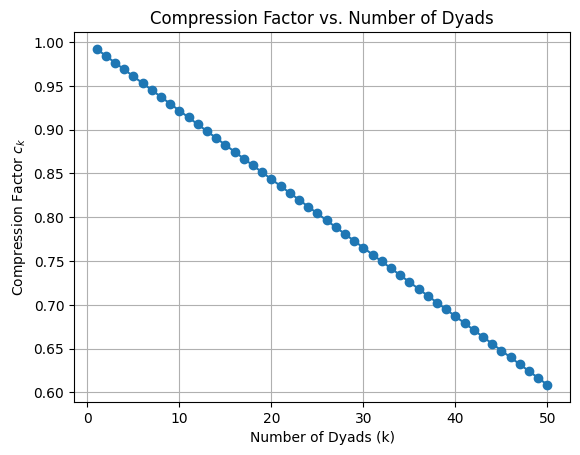

In [ ]:
def compression_factor(m, n, k):
    return 1 - (k * (m + n + 1)) / (m * n)

m, n = image.shape
compression_factors = [compression_factor(m, n, k) for k in ks]

plt.plot(ks, compression_factors, marker='o')
plt.xlabel('Number of Dyads (k)')
plt.ylabel('Compression Factor $c_k$')
plt.title('Compression Factor vs. Number of Dyads')
plt.grid(True)
plt.show()

In [12]:
U.shape, S.shape, VT.shape

((256, 256), (256,), (256, 256))

In [19]:
def compute_k_for_zero_compression_factor(m, n):
    return (m * n) / (m + n + 1)
m, n = image.shape
k_zero_compression = compute_k_for_zero_compression_factor(m, n)
k_zero_compression

127.75048732943469

In [20]:
compute_approximation_error(U, S, VT, int(k_zero_compression))

np.float64(1.6558040045039937)

# Now let's plot the single values of the image

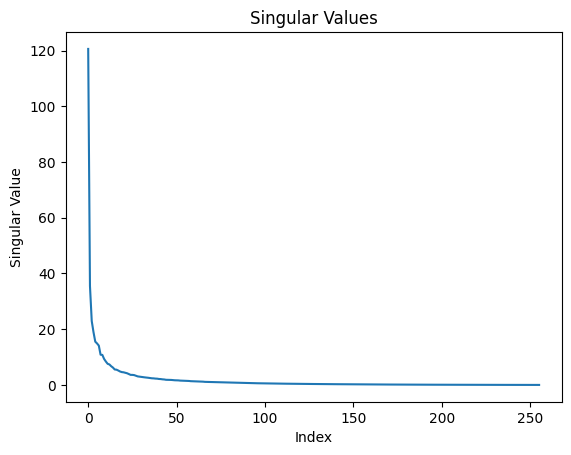

In [15]:
# Plot the singular values
plt.figure()
plt.plot(S)
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Value')
#plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.show()

## Conclusion
The first singular values are bigger as it should be accordingly to theory and it shows that the few singular values capture most of the image's information

## Classification of MNIST Digits with SVD Decomposition.
The task for this exercise is to learn the classification of MNIST digits by using SVD decomposition.
To proceed we recall that, given a matrix $X \in \mathbb{R}^{d \times N}$ and its SVD decomposition $X = USV^T$, it is easy to show that an orthogonal basis for the space of the columns is given by the first $p$ columns of the matrix $U$, where $p = rank(X)$ is equal to the number of non-zero singular values of $X$. We will make use of the space of the columns defined by the $U$ matrix and the following Theorem:

**Theorem 1.** Let $W$ be a subspace of $\mathbb{R}^d$ with $dim W = s$, and let ${w_1, \dots, w_s}$ be an orthogonal basis of $W$. Then, for any $x \in \mathbb{R}^d$, the projection $x^\perp$ of $x$ onto $W$ has the following form:

$$
x^\perp = \frac{x \cdot w_1}{w_1 \cdot w_1} w_1 + \dots + \frac{x \cdot w_s}{w_s \cdot w_s} w_s.
$$

**Corollary 1.1.** Let $X \in \mathbb{R}^{d \times N}$ be a matrix with SVD decomposition $X = USV^T$, since $p = rank(X)$ is the dimension of the space defined by the columns of $X$ and the columns of $U$, ${u_1, \dots, u_p}$ are an orthonormal basis for that space, the projection of an $d$-dimensional vector $x$ on this space can be easily
computed as:

$$
x^\perp = U(U^T x).
$$

Now, consider a binary classification problem, where the task is to tell if a given hand-written digit represents the number 3 or the number 4. We will refer to the class of the number 3 as $C_1$, and to the class of the number 4 as $C_2$. Let $N_1$ be the number of elements in $C_1$, and $N_2$ be the number of elements in $C_2$. Let $X_1 \in \mathbb{R}^{d \times N_1}$ be the matrix such that its columns are a flatten version of each digit in $C_1$, $X_2 \in \mathbb{R}^{d \times N_2}$ be the matrix such that its columns are a flatten version of each digit in $C_2$, and consider:

$$
X_1 = U_1S_1V_1^T, \\
X_2 = U_2S_2V_2^T,
$$

the SVD decomposition of the two matrices.

If $x \in \mathbb{R}^{d}$ is a new, unknown digit, we can classify it by projecting it to the spaces of $X_1$ and $X_2$ and call them:

$$
x_1^\perp = U_1(U_1^T x), \\
x_2^\perp = U_2(U_2^T x).
$$

Then, we can classify $x$ as $C_1$ if $||x − x_1^\perp ||_2 < ||x−x_2^\perp ||_2$ and vice versa as $C_2$ if $||x−x_2^\perp||_2 < || x − x_1^\perp ||_2$. In this exercise, you are required to implement this idea in Python.

1. Implement the binary classification algorithm discussed above for the digits 3 and 4 of MNIST dataset. Follow these steps:
   * Download the MNIST dataset from [kaggle.com/datasets/animatronbot/mnist-digit-recognizer](https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer) and load it into memory by following the steps we did in the [PCA class](https://devangelista2.github.io/statistical-mathematical-methods/ML/PCA.html). This dataset is presented as an array with shape $42000 \times 785$ , containining the flattened version of $42000$ $28 \times 28$ grayscale handwritten digits, plus a column representing the true class of the corresponding digit. By pre-processing the data as we did in class, you should obtain a matrix `X` containing the flattenened digits, with shape `(784, 42000)`, and a vector `Y` of the associated digit value, with a shape of `(42000,)`.
   * Write a function taking as input an index value `idx` and visualizes the image of `X` in the corresponding index (i.e. `X[idx, :]`). Use the function `plt.imshow`.
   * Extract from `X` those elements that corresponds to digits 3 or 4. Those digits represents the classes $C_1$ and $C_2$ defined above.
   * Split the obtained dataset in training and testing in a proportion of $80 : 20$. From now on, we will only consider the training set. The test set will be only used at the end of the exercise to test the algorithm.
   * Call `X1` and `X2` the submatrices of the training set, filtered by the two selected digits.
   * Compute the SVD decomposition of `X1` and `X2` with `np.linalg.svd(matrix, full matrices=False)` and denote the $U$-part of the two decompositions as `U1` and `U2`.
   * Take an unknown digit $x$ from the test set, and compute $x_1^\perp = U_1(U_1^T x)$ and $x_2^\perp = U_2(U_2^T x)$.
   * Compute the distances $d_1 = || x − x_1^\perp ||_2$ and $d_2 = || x − x_2^\perp||_2$, and classify $x$ as $C_1$ if $d_1 < d_2$, as $C_2$ if $d_2 < d_1$.
   * Repeat the experiment for different values of $x$ in the test set. Compute the misclassification number for this algorithm.
   * Repeat the experiment for different digits other than 3 or 4. There is a relationship between the visual similarity of the digits and the classification error?
   * Comment the obtained results.

2. The extension of this idea to the multiple classification task is trivial. Indeed, if we have more than 2 classes (say, $k$ different classes) $C_1, \dots, C_k$, we just need to repeat the same procedure as before for each matrix $X_1, \dots, X_k$ to obtain the distances $d_1, \dots, d_k$. Then, the new digit $y$ will be classified as $C_i$ if $d_i$ is lower that $d_j$ for each $j = 1,...,k$. Repeat the exercise above with a 3-digit example. Comment the differences.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import os
import requests
import zipfile

# Check if the file already exists
if not os.path.exists('mnist_train.csv'):
    # Download using python request
    url = 'https://www.kaggle.com/api/v1/datasets/download/animatronbot/mnist-digit-recognizer'
    response = requests.get(url, stream=True)

    with open('mnist_digit_recognizer.zip', 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    
    with zipfile.ZipFile('mnist_digit_recognizer.zip', 'r') as zip_ref:
        zip_ref.extractall()

    # Delete the zip file
    os.remove('mnist_digit_recognizer.zip')

    # Rename the extracted train.csv to mnist_train.csv
    os.rename('train.csv', 'mnist_train.csv')
else:
    print("mnist_train.csv already exists.")

mnist_train.csv already exists.


In [ ]:
data = pd.read_csv('mnist_train.csv')
X = data.iloc[:, 1:].values.T  # Shape (784, 42000)
Y = data.iloc[:, 0].values     # Shape (42000,)
X.shape, Y.shape

((784, 42000), (42000,))

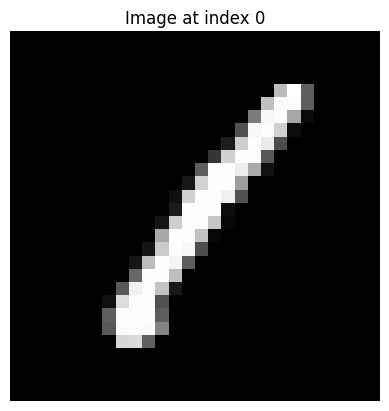

In [24]:
def visualize_image(idx):
    image = X[:, idx].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Image at index {idx}')
    plt.axis('off')
    plt.show()
visualize_image(0)

In [25]:
# Filter the data for digits 3 and 4
mask = (Y == 3) | (Y == 4)
X_filtered = X[:, mask]
Y_filtered = Y[mask]
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered.T, Y_filtered, test_size=0.2, random_state=42)
X_train = X_train.T
X_test = X_test.T

In [26]:
X_test.shape, Y_test.shape

((784, 1685), (1685,))

## Clustering with PCA
The task for this exercise is to verify the ability of PCA in clustering data by projecting very high-dimensional datapoints to 2 or 3 dimensions. In particular, consider the same MNIST dataset used in the previous exercise. You are asked to:
* Load and pre-process the dataset as did in the previous exercise, to get the matrix `X` with shape `(784, 42000)`, and the associated vector `Y`.
* Choose a number of digits (for example, 0, 6 and 9) and extract from `X` and `Y` the sub-dataset containing only the considered digits.
* Set $N_{train} < N$ and randomly sample a training set with $N_{train}$ datapoints from  `X` and `Y`. Call them `X_train` and `Y_train`. Everything else is the test set. Call them `X_test` and `Y_test`, correspondingly.
* Implement the algorithms computing the PCA of `X_train` with a fixed $k$. Visualize the results (for $k = 2$) and the position of the centroid of each cluster;
* Compute, for each cluster, the average distance from the centroid. Comment the result;
* Compute, for each cluster, the average distance from the centroid on the test set. Comment the results;
* Define a classification algorithm in this way: given a new observation `x`, compute the distance between `x` and each cluster centroid. Assign `x` to the class corresponding the the closer centroid. Compute the accuracy of this algorithm on the test set and compute its accuracy;
* Repeat this experiment for different values of k and different digits. What do you observe?
* Compare this classification algorithm with the one defined in the previous exercise. Which performs better?